In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import smtplib 

In [68]:
def generate_graph(x,y,title, x_label, y_label):
    plt.bar(x,y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    plt.save_fig("C:/Users/user/Datasets/10.png")

In [69]:
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email.mime.text import MIMEText
from email import encoders

def send_email(subject, body, to_email,attachment_path):
    msg = MIMEMultipart()
    msg["Subject"] = subject
    msg["From"] = "your_email@gmail.com"
    msg["To"] = to_email
    msg.attach(MIMEText(body, 'plain'))
    
    
    attachment = open(attachment_path, 'rb')
    part = MIMEBase('application', 'octet-stream')
    part.set_payload((attachment).read())
    encoders.encode_base64(part)
    part.add_header('Content-Disposition', "attachment; filename= %s" % attachment_path)
    msg.attach(part)

    
    with smtplib.SMTP("smtp.gmail.com", 587) as server:
        server.starttls()
        server.login("your_email@gmail.com", "Your password")
        server.sendmail("Your_email@gmail.com", to_email, msg.as_string())
        server.quit()

In [70]:
def main():
    df=pd.read_csv("C:\\Users\\user\\Datasets\\Customer Analysis_email_automation.csv")
    df=df.drop(columns=['item_id','First Name','Middle Initial','Last Name','SSN','User Name','Name Prefix'],axis=1)
    email_subject = 'Confirmation 2'
    email_body = 'hey! nikhil'
    name=input("Enter Name:")
    attachment_path = "C:/Users/user/Datasets/10.png"
    for i in df['full_name']:
        if(i==name):
            generate_graph(df[df['full_name']==name]['status'],df[df['full_name']==name]['qty_ordered'],'Comparison Graph Between Payment_Status & Quantity_Ordered','Payment_status','Quantity_Ordered')
            send_email(email_subject,email_body,df[df['full_name']==name]['E Mail'][1],attachment_path)
            print("Mail Sent")
        else:
            print("Invalid Name")
            break
           



C:\Users\user\AppData\Local\Temp\ipykernel_9160\2701176127.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:\\Users\\user\\Datasets\\Customer Analysis_email_automation.csv")


Enter Name:Titus, Jani


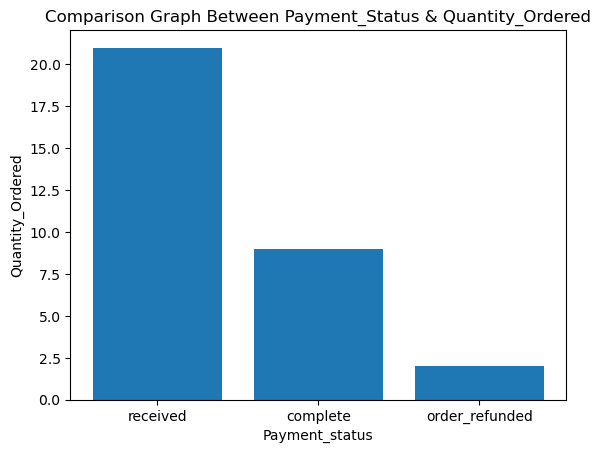

In [71]:
main()